In [2]:
print("hello kiet")

hello kiet


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("breast-cancer-wisconsin.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.shape

(569, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# drop id and unnamed columns

df = df.drop(columns =  ['id','Unnamed: 32'])
df.shape

(569, 31)

In [9]:
# change diagnosis to binary

df.loc[df['diagnosis']=='M', 'benign_0_mal_1'] = 1
df.loc[df['diagnosis']=='B', 'benign_0_mal_1'] = 0
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign_0_mal_1
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0


In [10]:
# drop diagnosis

df = df.drop(columns = ['diagnosis'])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign_0_mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0


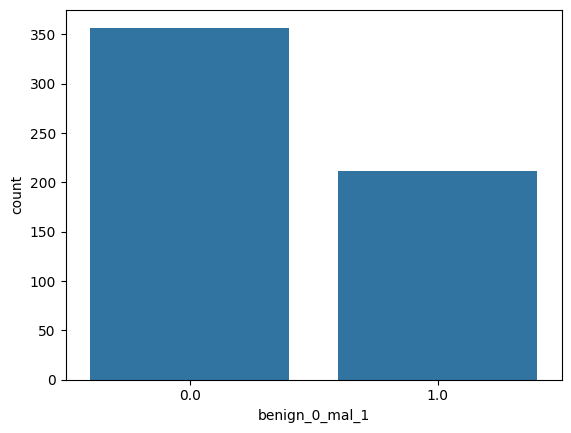

In [11]:
sns.countplot(x='benign_0_mal_1', data=df)
plt.show()

In [12]:
x=df.drop(columns=['benign_0_mal_1'])
y=df['benign_0_mal_1']
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: benign_0_mal_1, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
#create ANN with tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  InputLayer,Dense

In [17]:
model= Sequential()
model.add(InputLayer(input_shape=(30,)))
model.add(Dense(units=26, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                806       
                                                                 
 dense_1 (Dense)             (None, 15)                405       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1227 (4.79 KB)
Trainable params: 1227 (4.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test))

Epoch 1/100
15/15 [==============================] - 2s 27ms/step - loss: 0.7082 - accuracy: 0.3670 - val_loss: 0.6847 - val_accuracy: 0.3947
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6645 - accuracy: 0.4615 - val_loss: 0.6430 - val_accuracy: 0.7368
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6232 - accuracy: 0.8484 - val_loss: 0.6005 - val_accuracy: 0.8509
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5784 - accuracy: 0.8879 - val_loss: 0.5473 - val_accuracy: 0.8772
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5249 - accuracy: 0.8967 - val_loss: 0.4896 - val_accuracy: 0.8947
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4673 - accuracy: 0.8879 - val_loss: 0.4306 - val_accuracy: 0.9035
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4132 - accuracy: 0.9231 - val_loss: 0.3818 - val_accuracy: 0.8947
Epoch 8/100


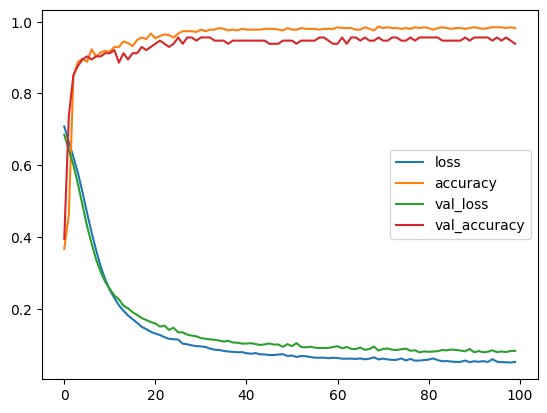

In [19]:
import matplotlib.pyplot as plt
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

In [22]:
# early stoping

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='Val_loss',patience = 20)
model.fit(x_train, y_train, epochs=100,
          validation_data=(x_test, y_test),
          callbacks=[early_stop])

Epoch 1/100
15/15 [==============================] - 0s 13ms/step - loss: 0.0492 - accuracy: 0.9824 - val_loss: 0.0815 - val_accuracy: 0.9474
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0514 - accuracy: 0.9846 - val_loss: 0.0885 - val_accuracy: 0.9474
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0526 - accuracy: 0.9846 - val_loss: 0.0905 - val_accuracy: 0.9474
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0499 - accuracy: 0.9802 - val_loss: 0.0801 - val_accuracy: 0.9561
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0485 - accuracy: 0.9824 - val_loss: 0.0883 - val_accuracy: 0.9474
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0492 - accuracy: 0.9824 - val_loss: 0.0845 - val_accuracy: 0.9386
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0491 - accuracy: 0.9868 - val_loss: 0.0846 - val_accuracy: 0.9386
Epoch 8/100


In [24]:
# save model

model.save('BC_model.h5')

In [25]:
# save scaler parameters

import pickle
with open('BC_scaler.pkl', 'wb') as f:
    pickle.dump(scaler,f)

In [26]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")

# Load the model
model = tf.keras.models.load_model('BC_model.h5')

# load scalar parameters
# Load fitted scaler
with open("BC_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)


# Example input data (replace with your own data)
# Ensure you include all 30 features expected by the model
input_data = {
    'radius_mean': [14.0],
    'texture_mean': [20.0],
    'perimeter_mean': [90.0],
    'area_mean': [600.0],
    'smoothness_mean': [0.1],
    'compactness_mean': [0.15],
    'concavity_mean': [0.2],
    'concave points_mean': [0.1],   # FIXED
    'symmetry_mean': [0.2],
    'fractal_dimension_mean': [0.06],

    'radius_se': [0.2],
    'texture_se': [1.0],
    'perimeter_se': [1.5],
    'area_se': [20.0],
    'smoothness_se': [0.005],
    'compactness_se': [0.02],
    'concavity_se': [0.03],
    'concave points_se': [0.01],    # FIXED
    'symmetry_se': [0.03],
    'fractal_dimension_se': [0.004],

    'radius_worst': [16.0],
    'texture_worst': [25.0],
    'perimeter_worst': [105.0],
    'area_worst': [800.0],
    'smoothness_worst': [0.12],
    'compactness_worst': [0.2],
    'concavity_worst': [0.3],
    'concave points_worst': [0.15], # FIXED
    'symmetry_worst': [0.25],
    'fractal_dimension_worst': [0.08]
}


# Convert to DataFrame
input_df = pd.DataFrame(input_data)

# Preprocess the input data (normalize, scale, etc.)
input_array = scaler.transform(input_df)  # Directly use the transformed array

# Make predictions
predictions = model.predict(input_array)

# For binary classification, convert probabilities to class labels
predicted_classes = (predictions > 0.5).astype("int32")  # Assuming a threshold of 0.5

# # Example mapping for binary classification
class_mapping = {0: 'Benign', 1: 'Malignant'}

# List comprehension to map predicted class labels to their corresponding names
predicted_class_names = []
for label in predicted_classes:
    predicted_class_names.append(class_mapping[label[0]])


print(predicted_class_names)

1/1 [==============================] - 0s 194ms/step
['Malignant']
